In [4]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import helper

# To allow for inline rendering of plots.
%matplotlib inline

In [3]:
data, X_train, y_train, X_test, y_test, movies_data = helper.load_data('data/data.txt',
'data/train.txt', 'data/test.txt', 'data/movies.txt')

In [15]:
# Array stores total of user ratings and number of ratings
movie_ratings = np.zeros((len(movies_data), 2))

In [77]:
# Loop through data set
for d in data:
    # Add user's rating for corresponding movie
    movie_ratings[int(d[1] - 1)][0] += d[2]
    # Count of ratings per movie
    movie_ratings[int(d[1] - 1)][1] += 1

#All ratings of all movies
all_ratings = data[:,2]
movie_ratings.shape

(1682, 2)

In [74]:
'''
Given an input array movie_ratings and scalar n_max, return the indices in 
movie_ratings of the n_max movies with the most number of ratings.

Input:
    - movie_ratings: n = len(movies_data) by 2 array containing n movies where
        each row contains [Cumulative Ratings, # of Ratings]
    - n_max: desired n most popular movies

Output:
    - max_positions: indices of n_max movies with most number of ratings

'''
def n_max_pos(movie_ratings, n_max):
    rating_per_mov = movie_ratings[:,1]
    sorted_pos = np.argsort(rating_per_mov)
    max_positions = sorted_pos[-1*n_max:]
    return max_positions

In [75]:
most_ratings_pos = n_max_pos(movie_ratings, 10)

movie_ratings[n_max_pos(movie_ratings, 10)]

array([[13779.,  4365.],
       [18288.,  4563.],
       [18999.,  4572.],
       [17424.,  4581.],
       [22869.,  5247.]])

In [17]:
avgs = np.zeros(len(movies_data))
for i, m in enumerate(movie_ratings):
    all_ratings[i] = m[1]
    if m[1] != 0:
        avgs[i] = m[0] / m[1]

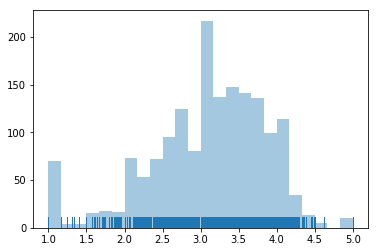

In [10]:
sns.distplot(avgs, kde=False, rug=True)

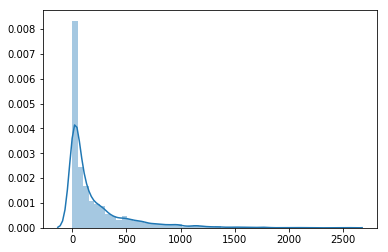

In [15]:
sns.distplot(movie_ratings[:,0])

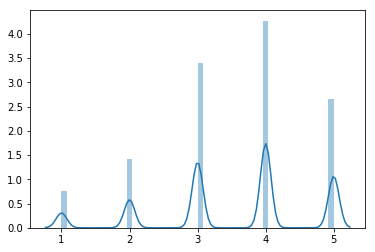

In [49]:
sns.distplot(all_ratings)

In [35]:
print(all_ratings.shape)

(100000,)


Text(0,0.5,'Number of Ratings')

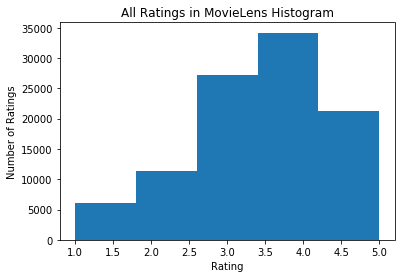

In [48]:
all_ratings_hist = plt.hist(all_ratings, bins = 5)
plt.title('All Ratings in MovieLens Histogram')
plt.xlabel('Rating')
plt.ylabel('Number of Ratings')